# DataONE Contributors

Examine the solr index to determine the number of contributors to content exposed by DataONE. The count provided here is likely higher than the actual number of contributors because the indexing process only performs minimal pre-processing of names added to the index. For example, in some cases names appear with both ASCII and Unicode variants and are treated as separate.

In [1]:
import requests
import json
import pprint
from datetime import datetime
import dateutil

SOLR_TIME_FORMAT = "%Y-%m-%dT%H:%M:%SZ"

T_NOW = datetime.utcnow()
T_START = datetime(2012,7,1)


In [2]:
def getContributors(t_start=None, t_end=None):
    url = "https://cn.dataone.org/cn/v2/query/solr/"
    params = {
        "q":"*:*",
        "facet":"on",
        "rows":"0",
        "facet.limit":"-1",
        "facet.field":"investigator",
        "wt":"json",
             }
    dq = None
    if t_start is not None:
        st = f"{t_start:{SOLR_TIME_FORMAT}}"
        if t_end is None:
            dq = f"dateUploaded:[\"{st}\" TO \"{T_NOW}\"]"
        else:
            dq = f"dateUploaded:[\"{st}\" TO \"{t_end:{SOLR_TIME_FORMAT}}\"]"
    else:
        et = f"{t_end:{SOLR_TIME_FORMAT}}"
        dq = f"dateUploaded:[* TO \"{et}\"]"
    if dq is not None:
        params["q"] = dq
    response = requests.get(url, params=params)
    data = json.loads(response.text)
    investigators = data["facet_counts"]["facet_fields"]["investigator"]
    names = []
    counts = []
    for i in range(0, len(investigators), 2):
        n = investigators[i+1]
        if n > 0:
            names.append(investigators[i])
            counts.append(investigators[i+1])
    return names, counts



In [6]:
c_date = T_START
name_count = []
columns = ["date","contributors"]
print(",".join(columns))
while c_date < T_NOW:
    names, counts = getContributors(t_end = c_date)
    entry = (c_date, len(names))
    print(f"{entry[0]:%Y-%m-%d},{entry[1]}")
    name_count.append(entry)
    c_date = c_date + dateutil.relativedelta.relativedelta(months=+1)


date,contributors
2012-07-01,10741
2012-08-01,11900
2012-09-01,12372
2012-10-01,12784
2012-11-01,13562
2012-12-01,14145
2013-01-01,14594
2013-02-01,15405
2013-03-01,16250
2013-04-01,16926
2013-05-01,17479
2013-06-01,18434
2013-07-01,19077
2013-08-01,19717
2013-09-01,20488
2013-10-01,21481
2013-11-01,22236
2013-12-01,22899
2014-01-01,23468
2014-02-01,24402
2014-03-01,25338
2014-04-01,26142
2014-05-01,27010
2014-06-01,27738
2014-07-01,28675
2014-08-01,29670
2014-09-01,30339
2014-10-01,31801
2014-11-01,32896
2014-12-01,34765
2015-01-01,36120
2015-02-01,37216
2015-03-01,38473
2015-04-01,40018
2015-05-01,41530
2015-06-01,42940
2015-07-01,44434
2015-08-01,45835
2015-09-01,47079
2015-10-01,48547
2015-11-01,49998
2015-12-01,51250
2016-01-01,52730
2016-02-01,54083
2016-03-01,55565
2016-04-01,58823
2016-05-01,60980
2016-06-01,62622
2016-07-01,63926
2016-08-01,65132
2016-09-01,66912
2016-10-01,68409
2016-11-01,71985
2016-12-01,73708
2017-01-01,78495
2017-02-01,80239
2017-03-01,81732
2017-04-01,83

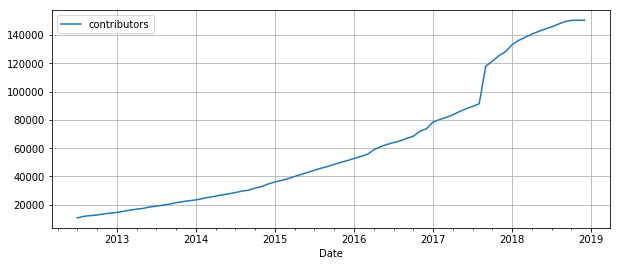

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data_frame = pd.DataFrame(name_count, columns=columns)
data_frame.set_index('date', inplace=True)

plot = data_frame.plot(figsize=(10,4))
plot.set_xlabel("Date")
plot.grid(True)